In [50]:
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns



from scipy.stats import boxcox 
from scipy.stats import skew



In [2]:
yield_df = pd.read_csv("project/crop yield/yield_df.csv")

In [3]:
yield_df.drop(columns=["Unnamed: 0","Item"], inplace=True)

In [4]:
yield_df_canada = yield_df[(yield_df['Year'] >= 2006) & (yield_df['Year'] <= 2016) & (yield_df['Area'] == 'Canada')]
yield_df_canada

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
5938,Canada,2006,84737,537.0,36572.75,8.66
5939,Canada,2006,84737,537.0,36572.75,9.83
5940,Canada,2006,84737,537.0,36572.75,6.95
5941,Canada,2006,84737,537.0,36572.75,6.30
5942,Canada,2006,84737,537.0,36572.75,7.85
...,...,...,...,...,...,...
6125,Canada,2013,35943,537.0,81659.80,10.11
6126,Canada,2013,35943,537.0,81659.80,7.86
6127,Canada,2013,35943,537.0,81659.80,7.08
6128,Canada,2013,35943,537.0,81659.80,8.46


In [5]:
yield_df_canada.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,192.000000,192.000000,192.0,192.000000,192.000000
mean,2009.500000,68293.156250,537.0,58534.422500,7.604375
std,2.297278,42494.154486,0.0,13633.238055,1.410009
min,2006.000000,23010.000000,537.0,36572.750000,4.710000
25%,2007.750000,28627.500000,537.0,51565.482500,6.695000
50%,2009.500000,59833.000000,537.0,57789.700000,7.610000
75%,2011.250000,103132.750000,537.0,64957.625000,8.617500
max,2013.000000,132270.000000,537.0,81659.800000,10.510000


In [6]:
_yield = pd.read_csv("project/crop yield/yield.csv")

In [7]:
_yield.drop(columns=["Domain Code","Domain","Area Code","Element Code","Item","Year Code","Unit","Item Code","Element"], inplace=True)

In [8]:
_yield_canada = _yield[(_yield['Year'] >= 2006) & (_yield['Year'] <= 2016) & (_yield['Area'] == 'Canada')]
_yield_canada

,Area,Year,Value
8598,Canada,2006,84737
8599,Canada,2007,85108
8600,Canada,2008,90623
8601,Canada,2009,83723
8602,Canada,2010,97385
8603,Canada,2011,88946
8604,Canada,2012,92109
8605,Canada,2013,95878
8606,Canada,2014,93647
8607,Canada,2015,103370


In [9]:
_yield_canada.describe()

,Year,Value
count,44.000000,44.000000
mean,2011.000000,69036.522727
std,3.198837,43170.700416
min,2006.000000,23010.000000
25%,2008.000000,28714.750000
50%,2011.000000,59833.000000
75%,2014.000000,107621.500000
max,2016.000000,133611.000000


In [10]:
weather_df = pd.read_csv("project/weather/weatherHistory.csv")

In [11]:
weather_df.drop(columns=["Apparent Temperature (C)","Wind Bearing (degrees)","Daily Summary"], inplace=True)

In [12]:
weather_df

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,0.89,14.1197,15.8263,0.0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646,15.8263,0.0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,14.9569,0.0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036,15.8263,0.0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,0.83,11.0446,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,0.43,10.9963,16.1000,0.0,1014.36
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,0.48,10.0947,15.5526,0.0,1015.16
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,0.56,8.9838,16.1000,0.0,1015.66
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,0.60,10.5294,16.1000,0.0,1015.95


In [13]:
weather_df['Formatted Date'] = pd.to_datetime(weather_df['Formatted Date'], utc=True)
weather_df['Year'] = weather_df['Formatted Date'].dt.year
weather_df.drop(columns=['Formatted Date'],inplace=True) 
weather_df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Loud Cover,Pressure (millibars),Year
0,Partly Cloudy,rain,9.472222,0.89,14.1197,15.8263,0.0,1015.13,2006
1,Partly Cloudy,rain,9.355556,0.86,14.2646,15.8263,0.0,1015.63,2006
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,14.9569,0.0,1015.94,2006
3,Partly Cloudy,rain,8.288889,0.83,14.1036,15.8263,0.0,1016.41,2006
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,15.8263,0.0,1016.51,2006
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.9963,16.1000,0.0,1014.36,2016
96449,Partly Cloudy,rain,24.583333,0.48,10.0947,15.5526,0.0,1015.16,2016
96450,Partly Cloudy,rain,22.038889,0.56,8.9838,16.1000,0.0,1015.66,2016
96451,Partly Cloudy,rain,21.522222,0.60,10.5294,16.1000,0.0,1015.95,2016


In [14]:
weather_df.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Loud Cover,Pressure (millibars),Year
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453.00000
mean,11.932678,0.734899,10.810640,10.347325,0.0,1003.235956,2011.00029
std,9.551546,0.195473,6.913571,4.192123,0.0,116.969906,3.16216
min,-21.822222,0.000000,0.000000,0.000000,0.0,0.000000,2005.00000
25%,4.688889,0.600000,5.828200,8.339800,0.0,1011.900000,2008.00000
50%,12.000000,0.780000,9.965900,10.046400,0.0,1016.450000,2011.00000
75%,18.838889,0.890000,14.135800,14.812000,0.0,1021.090000,2014.00000
max,39.905556,1.000000,63.852600,16.100000,0.0,1046.380000,2016.00000


In [15]:
merged_df = pd.merge(yield_df_canada, _yield_canada, how='inner', on='Year')
merged_df

,Area_x,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_y,Value
0,Canada,2006,84737,537.0,36572.75,8.66,Canada,84737
1,Canada,2006,84737,537.0,36572.75,8.66,Canada,130482
2,Canada,2006,84737,537.0,36572.75,8.66,Canada,28850
3,Canada,2006,84737,537.0,36572.75,8.66,Canada,26096
4,Canada,2006,84737,537.0,36572.75,9.83,Canada,84737
...,...,...,...,...,...,...,...,...
763,Canada,2013,35943,537.0,81659.80,8.46,Canada,35943
764,Canada,2013,35943,537.0,81659.80,9.85,Canada,95878
765,Canada,2013,35943,537.0,81659.80,9.85,Canada,132270
766,Canada,2013,35943,537.0,81659.80,9.85,Canada,28810


In [16]:
final_merged_df = pd.merge(merged_df, weather_df, how='inner', on='Year')


In [17]:
final_merged_df

,Area_x,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_y,Value,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Loud Cover,Pressure (millibars)
0,Canada,2006,84737,537.0,36572.75,8.66,Canada,84737,Partly Cloudy,rain,9.472222,0.89,14.1197,15.8263,0.0,1015.13
1,Canada,2006,84737,537.0,36572.75,8.66,Canada,84737,Partly Cloudy,rain,9.355556,0.86,14.2646,15.8263,0.0,1015.63
2,Canada,2006,84737,537.0,36572.75,8.66,Canada,84737,Mostly Cloudy,rain,9.377778,0.89,3.9284,14.9569,0.0,1015.94
3,Canada,2006,84737,537.0,36572.75,8.66,Canada,84737,Partly Cloudy,rain,8.288889,0.83,14.1036,15.8263,0.0,1016.41
4,Canada,2006,84737,537.0,36572.75,8.66,Canada,84737,Mostly Cloudy,rain,8.755556,0.83,11.0446,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734587,Canada,2013,35943,537.0,81659.80,9.85,Canada,35943,Mostly Cloudy,rain,15.916667,0.89,10.4650,8.3076,0.0,1018.88
6734588,Canada,2013,35943,537.0,81659.80,9.85,Canada,35943,Mostly Cloudy,rain,14.816667,0.88,13.9909,6.0214,0.0,1019.24
6734589,Canada,2013,35943,537.0,81659.80,9.85,Canada,35943,Mostly Cloudy,rain,14.283333,0.90,6.2468,6.8747,0.0,1019.34
6734590,Canada,2013,35943,537.0,81659.80,9.85,Canada,35943,Partly Cloudy,rain,12.900000,0.93,3.6547,7.6475,0.0,1019.48


In [18]:
final_merged_df.drop(columns=["Area_x","Area_y","Precip Type","Loud Cover","Value"],inplace=True)

# EDA

In [19]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6734592 entries, 0 to 6734591
Data columns (total 11 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Year                           int64  
 1   hg/ha_yield                    int64  
 2   average_rain_fall_mm_per_year  float64
 3   pesticides_tonnes              float64
 4   avg_temp                       float64
 5   Summary                        object 
 6   Temperature (C)                float64
 7   Humidity                       float64
 8   Wind Speed (km/h)              float64
 9   Visibility (km)                float64
 10  Pressure (millibars)           float64
dtypes: float64(8), int64(2), object(1)
memory usage: 565.2+ MB


In [20]:
final_merged_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
count,6.734592e+06,6.734592e+06,6734592.0,6.734592e+06,6.734592e+06,6.734592e+06,6.734592e+06,6.734592e+06,6.734592e+06,6.734592e+06
mean,2.009501e+03,6.829425e+04,537.0,5.853875e+04,7.604474e+00,1.180427e+01,7.302566e-01,1.087189e+01,1.004218e+01,1.003478e+03
std,2.290765e+00,4.238318e+04,0.0,1.359390e+04,1.406270e+00,9.789445e+00,1.975706e-01,7.010953e+00,3.918299e+00,1.158202e+02
min,2.006000e+03,2.301000e+04,537.0,3.657275e+04,4.710000e+00,-2.182222e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.008000e+03,2.862750e+04,537.0,5.370730e+04,6.730000e+00,4.044444e+00,5.900000e-01,5.747700e+00,8.420300e+00,1.011740e+03
50%,2.010000e+03,5.983300e+04,537.0,6.105000e+04,7.610000e+00,1.198333e+01,7.800000e-01,9.982000e+00,9.982000e+00,1.016430e+03
75%,2.012000e+03,1.031328e+05,537.0,7.350890e+04,8.640000e+00,1.886111e+01,8.900000e-01,1.422033e+01,1.139880e+01,1.021300e+03
max,2.013000e+03,1.322700e+05,537.0,8.165980e+04,1.051000e+01,3.990556e+01,1.000000e+00,6.385260e+01,1.610000e+01,1.046380e+03


In [21]:
final_merged_df.isnull().sum()

Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
Summary                          0
Temperature (C)                  0
Humidity                         0
Wind Speed (km/h)                0
Visibility (km)                  0
Pressure (millibars)             0
dtype: int64

In [22]:
columns_to_scale = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp',
                     'Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']

scaler = MinMaxScaler()

final_merged_df[columns_to_scale] = scaler.fit_transform(final_merged_df[columns_to_scale])



In [23]:
final_merged_df

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Summary,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,2006,0.564955,0.0,0.0,0.681034,Partly Cloudy,0.506975,0.89,0.221130,0.983,0.970135
1,2006,0.564955,0.0,0.0,0.681034,Partly Cloudy,0.505085,0.86,0.223399,0.983,0.970613
2,2006,0.564955,0.0,0.0,0.681034,Mostly Cloudy,0.505445,0.89,0.061523,0.929,0.970909
3,2006,0.564955,0.0,0.0,0.681034,Partly Cloudy,0.487805,0.83,0.220877,0.983,0.971358
4,2006,0.564955,0.0,0.0,0.681034,Mostly Cloudy,0.495365,0.83,0.172970,0.983,0.971454
...,...,...,...,...,...,...,...,...,...,...,...
6734587,2013,0.118369,0.0,1.0,0.886207,Mostly Cloudy,0.611376,0.89,0.163893,0.516,0.973719
6734588,2013,0.118369,0.0,1.0,0.886207,Mostly Cloudy,0.593556,0.88,0.219112,0.374,0.974063
6734589,2013,0.118369,0.0,1.0,0.886207,Mostly Cloudy,0.584916,0.90,0.097832,0.427,0.974159
6734590,2013,0.118369,0.0,1.0,0.886207,Partly Cloudy,0.562506,0.93,0.057237,0.475,0.974292


In [24]:
final_merged_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
count,6.734592e+06,6.734592e+06,6734592.0,6.734592e+06,6.734592e+06,6.734592e+06,6.734592e+06,6.734592e+06,6.734592e+06,6.734592e+06
mean,2.009501e+03,4.144632e-01,0.0,4.871910e-01,4.990472e-01,5.447547e-01,7.302566e-01,1.702655e-01,6.237378e-01,9.589991e-01
std,2.290765e+00,3.879113e-01,0.0,3.015035e-01,2.424604e-01,1.585906e-01,1.975706e-01,1.097990e-01,2.433726e-01,1.106866e-01
min,2.006000e+03,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.008000e+03,5.141406e-02,0.0,3.800326e-01,3.482759e-01,4.190442e-01,5.900000e-01,9.001513e-02,5.230000e-01,9.668954e-01
50%,2.010000e+03,3.370218e-01,0.0,5.428887e-01,5.000000e-01,5.476555e-01,7.800000e-01,1.563288e-01,6.200000e-01,9.713775e-01
75%,2.012000e+03,7.333219e-01,0.0,8.192186e-01,6.775862e-01,6.590766e-01,8.900000e-01,2.227055e-01,7.080000e-01,9.760317e-01
max,2.013000e+03,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [25]:
label_encoder = LabelEncoder()

final_merged_df['Summary_encoded'] = label_encoder.fit_transform(final_merged_df['Summary'])
final_merged_df.drop(columns=["Summary"],inplace=True)
final_merged_df

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Summary_encoded
0,2006,0.564955,0.0,0.0,0.681034,0.506975,0.89,0.221130,0.983,0.970135,19
1,2006,0.564955,0.0,0.0,0.681034,0.505085,0.86,0.223399,0.983,0.970613,19
2,2006,0.564955,0.0,0.0,0.681034,0.505445,0.89,0.061523,0.929,0.970909,17
3,2006,0.564955,0.0,0.0,0.681034,0.487805,0.83,0.220877,0.983,0.971358,19
4,2006,0.564955,0.0,0.0,0.681034,0.495365,0.83,0.172970,0.983,0.971454,17
...,...,...,...,...,...,...,...,...,...,...,...
6734587,2013,0.118369,0.0,1.0,0.886207,0.611376,0.89,0.163893,0.516,0.973719,17
6734588,2013,0.118369,0.0,1.0,0.886207,0.593556,0.88,0.219112,0.374,0.974063,17
6734589,2013,0.118369,0.0,1.0,0.886207,0.584916,0.90,0.097832,0.427,0.974159,17
6734590,2013,0.118369,0.0,1.0,0.886207,0.562506,0.93,0.057237,0.475,0.974292,19


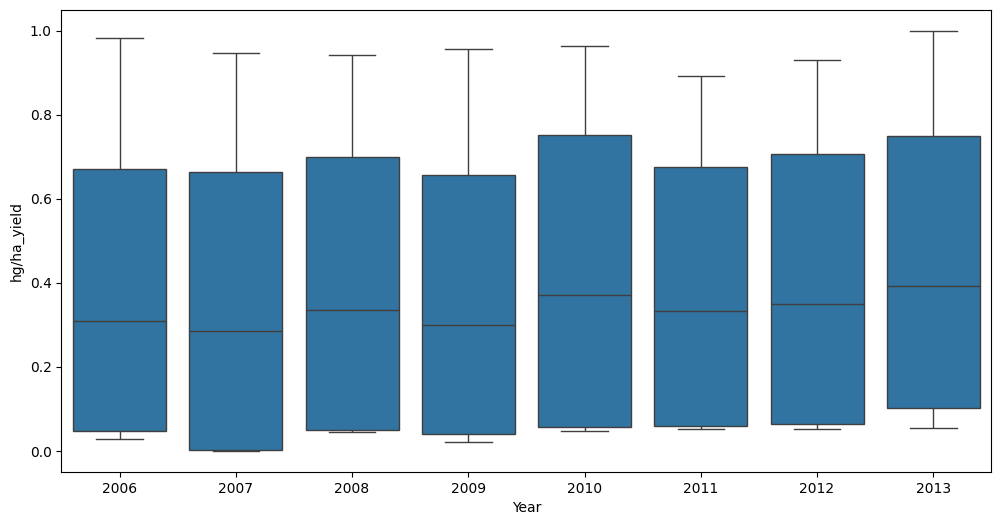

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='hg/ha_yield', data=final_merged_df)
plt.show()


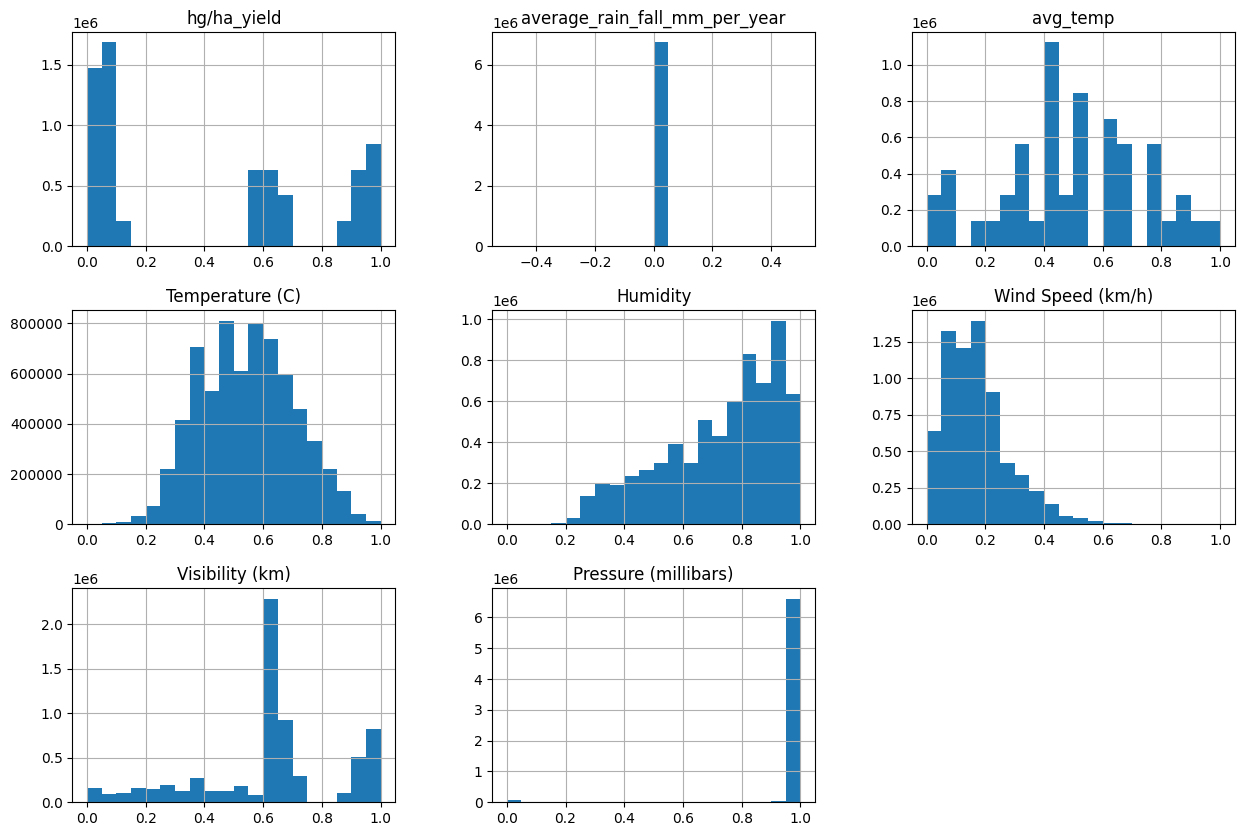

In [28]:
selected_columns = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'avg_temp', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
final_merged_df[selected_columns].hist(bins=20, figsize=(15, 10))
plt.show()


In [39]:
skewness = final_merged_df.skew()
skewed_features = final_merged_df.drop(columns=['Year','average_rain_fall_mm_per_year']).columns

skewed_features

Index(['hg/ha_yield', 'pesticides_tonnes', 'avg_temp', 'Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Visibility (km)',
       'Pressure (millibars)', 'Summary_encoded'],
      dtype='object')

In [40]:
skewness

Year                            -0.000320
hg/ha_yield                      0.019458
average_rain_fall_mm_per_year    0.000000
pesticides_tonnes                0.129433
avg_temp                        -0.102524
Temperature (C)                  0.069540
Humidity                        -0.692868
Wind Speed (km/h)                1.125600
Visibility (km)                 -0.510847
Pressure (millibars)            -8.507713
Summary_encoded                 -1.544924
dtype: float64

In [41]:
for column in skewed_features:
    final_merged_df[column], _ = boxcox(final_merged_df[column] + 1)


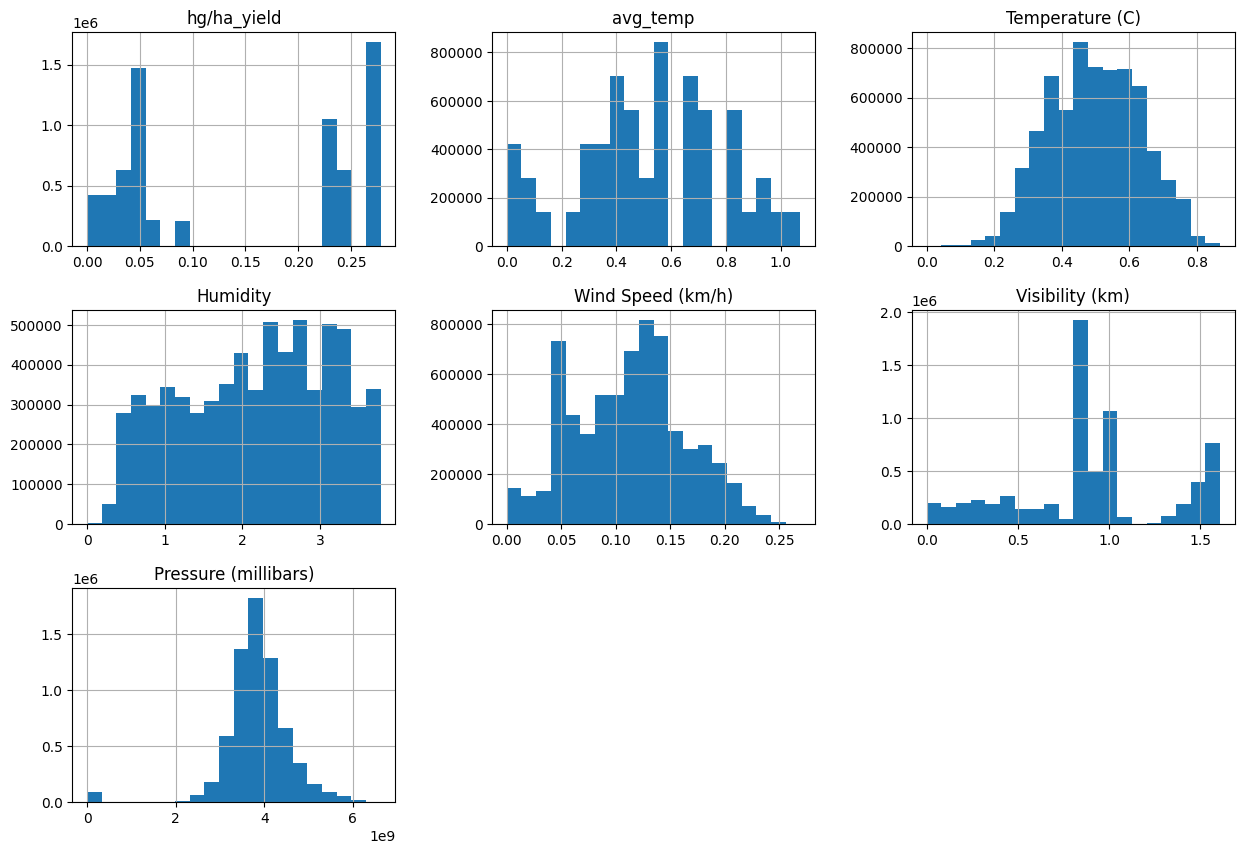

In [42]:
selected_columns = ['hg/ha_yield',  'avg_temp', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
final_merged_df[selected_columns].hist(bins=20, figsize=(15, 10))
plt.show()


In [45]:
X = final_merged_df.drop(columns="hg/ha_yield")


,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Summary_encoded
0,2006,0.0,0.000000,0.716564,0.467874,2.960915,0.145667,1.570928,3.747646e+09,14274.003212
1,2006,0.0,0.000000,0.716564,0.466250,2.761137,0.146615,1.570928,3.782221e+09,14274.003212
2,2006,0.0,0.000000,0.716564,0.466559,2.960915,0.054116,1.453020,3.803813e+09,9744.573889
3,2006,0.0,0.000000,0.716564,0.451369,2.570845,0.145561,1.570928,3.836779e+09,14274.003212
4,2006,0.0,0.000000,0.716564,0.457887,2.570845,0.123602,1.570928,3.843829e+09,9744.573889
...,...,...,...,...,...,...,...,...,...,...
6734587,2013,0.0,0.849785,0.944112,0.556429,2.960915,0.118988,0.674928,4.014648e+09,9744.573889
6734588,2013,0.0,0.849785,0.944112,0.541468,2.893250,0.144818,0.456955,4.041234e+09,9744.573889
6734589,2013,0.0,0.849785,0.944112,0.534191,3.029670,0.080160,0.535397,4.048649e+09,9744.573889
6734590,2013,0.0,0.849785,0.944112,0.515249,3.242580,0.050780,0.609429,4.059053e+09,14274.003212


In [44]:
y = final_merged_df['hg/ha_yield']

In [48]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [51]:
model = LinearRegression()


In [52]:
model.fit(X_train, y_train)


LinearRegression()

In [53]:
y_val_pred = model.predict(X_val)


In [54]:
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

In [55]:
mse_val

0.011758715946059635

In [56]:
r2_val

0.005924081003005011

In [57]:
y_test_pred = model.predict(X_test)


In [58]:
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [59]:
mse_test

0.011761866114853496

In [60]:
r2_test

0.0056510315428515145